In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, JLD
E, x, y  = -100..100, -100..100,  -100..100
box = E × x × y
using CairoMakie, GLMakie

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [21]:
I0 = 0.0; U0 = 0.2;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.638526524981895, 0.7320692774159767, 0.40718205935401675]

ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 10.1353  0.736187  0.427055

In [20]:
for fp_ in fp
    println(fp_);
    println();
end

for ei_ in ei
    for eig in ei_
        println(eig);
    end;
    println();
end

[2.90960659933216, 0.8948984285294285, 0.9382684654603843]

[7.8450160278605185, 0.7595863262619175, 0.5423074887976319]

[1.9040269550894617, 0.9286298021595097, 0.9629574070896685]

-7.507164268160341 + 0.0im
-0.30303030299195444 + 0.0im
6.40355269270138 + 0.0im

-1.711946170738106 - 11.794421887202063im
-1.711946170738106 + 11.794421887202063im
-0.36252926832260857 + 0.0im

-6.41820396608596 - 4.981255790486496im
-6.41820396608596 + 4.981255790486496im
-0.30303030303346057 + 0.0im



In [7]:
index_fp = 1
ϵ = 1e-6
shift_unstable = fp[index_fp] + (real(ei[index_fp]) .*[0, ϵ, ϵ] )

3-element SVector{3, Float64} with indices SOneTo(3):
 8.416903922386378
 0.7381020827340095
 0.43637402612386983

In [8]:
tr_, trange = trajectory(ds, 500, shift_unstable, Δt = tstep,)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

In [13]:
a = ei[1]
sort(a, by = x -> (floor(real(x), digits = 6), -floor(imag(x), digits = 6)), rev=true)

3-element Vector{ComplexF64}:
 1.9646654423103467 - 14.106537899296091im
 1.9646654423103467 + 14.106537899296091im
 -6.619933300836934 + 0.0im

In [12]:
ei[1]

3-element Vector{ComplexF64}:
 -6.619933300836934 + 0.0im
 1.9646654423103467 - 14.106537899296091im
 1.9646654423103467 + 14.106537899296091im

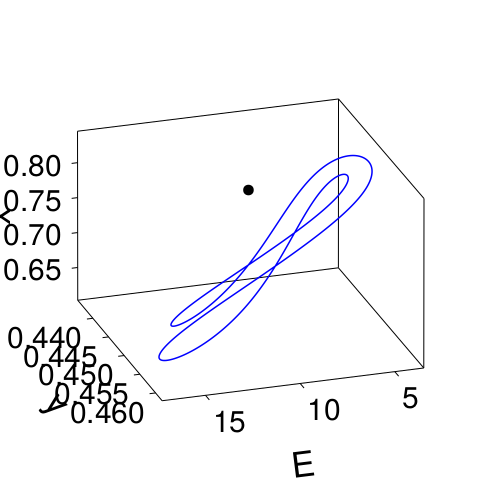

CairoMakie.Screen{IMAGE}


In [9]:
st, ed = 450000, 500000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (500, 500))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

for fp_ in fp
    scatter!(fp_[idx], fp_[idy], fp_[idz], color = :black, markersize = 15)
end

lines!(ax, tr_[st:ed, idx], tr_[st:ed, idy], tr_[st:ed, idz], lw = 1.0, color = :blue)
display(f)

In [10]:
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [66]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
eigens = load("eigens_to_top_righter.jld")["data"]
vars = load("x_to_top_righter.jld")["data"]

4×100 Matrix{Float64}:
 3.74002   3.75001   3.763     3.77988   …  12.7667    12.8665     12.9664
 0.882201  0.881914  0.881542  0.881058      0.643148   0.640548    0.637947
 0.924305  0.923953  0.923492  0.922889      0.104492   0.0997309   0.0951628
 0.141672  0.141712  0.141765  0.141832      0.543738   0.545656    0.547594

In [67]:
eig1 = eigens[1, :]
eig2 = eigens[2, :]
eig3 = eigens[3, :]
E_range = vars[1, :];

In [70]:
real(eig1)

100-element Vector{Float64}:
 -3.3856960669185625
 -3.370419665521185
 -3.3508589312951442
 -3.3259285981737015
 -3.2943488353130577
 -3.2546692801633963
 -3.2053480878779324
 -3.1449258896816543
 -3.0723526235025993
 -2.987544478875659
  ⋮
 -6.545806071994461
 -6.606271612434307
 -6.666734180589582
 -6.727201565089692
 -6.78768147581915
 -6.848181649893513
 -6.908709795611671
 -6.969273714390881
 -7.029881242654955

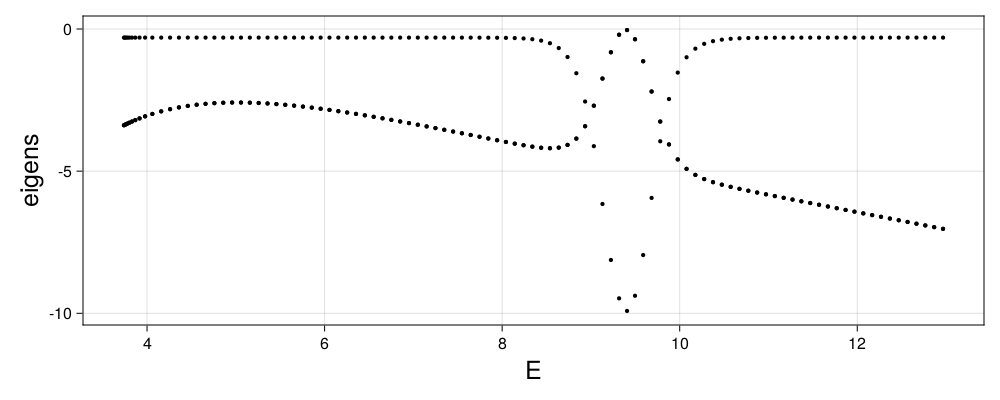

CairoMakie.Screen{IMAGE}


In [91]:
CairoMakie.activate!()
f = Figure(resolution = (1000, 400))
ax = Axis(f[1, 1], xlabel = "E", ylabel = "eigens", xlabelsize = 25, ylabelsize = 25)
scatter!(ax, E_range, real(eig1), lw = 1.0, color = :black, markersize = 6.0)
scatter!(ax, E_range, real(eig2), lw = 1.0, color = :black, markersize = 6.0)
scatter!(ax, E_range, real(eig3), lw = 1.0, color = :black, markersize = 6.0)
display(f)